<h1> Data Storytelling </h1>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [43]:
df = pd.read_csv('C:/Users/chech/PC Febrero 2023/CoderHouse/Data Scients/proyectoCoder/finalProject/data/movDic.csv')

C:\Users\chech\AppData\Local\Temp\ipykernel_22640\474200707.py:1: DtypeWarning: Columns (29,34,35,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/chech/PC Febrero 2023/CoderHouse/Data Scients/proyectoCoder/finalProject/data/movDic.csv')


<h2> Información transaccional. </h2>
<p> Sistemas de pago de vajo valor.
<p>

<h4> Variables disponibles en el set de datos. </h4> 

In [44]:
df.columns

Index(['Secuencia', 'ID. Transaccion', 'Nombre Transaccion', 'BIN', 'Tarjeta',
       'ID. Canal', 'Nombre Canal', 'Error', 'Nombre Error',
       'Responsable Error', 'ID. Origen', 'Nombre Origen', 'ID. Grupo',
       'Nombre Grupo', 'Valor', 'Fecha Transaccion', 'Fecha Contable',
       'Codigo Entidad Orgien', 'Codigo Entidad Destino',
       'Cooperativa Terminal', 'ID. Terminal', 'Nombre Terminal',
       'Serial Terminal', 'Tipo Cuenta 1', 'Cuenta 1', 'Tipo Documento',
       'Documento', 'Adquiriente', 'Pais', 'Departamento', 'Ciudad', 'Dia',
       'Nombre Comercio', 'Tipo Cuenta Destino', 'Cuenta Destino',
       'Documento Cliente Destino', 'Nombre Banco Destino',
       'Nombre Banco Origen', 'Cuenta Origen Int.', 'Documento Origen Int.',
       'Nombre Cliente Origen', 'Nombre Cliente Destino Interban',
       'Nombre Cliente Destino', 'Cus', 'Celular Origen', 'Celular Destino',
       'Servicio Origen Transaccion'],
      dtype='object')

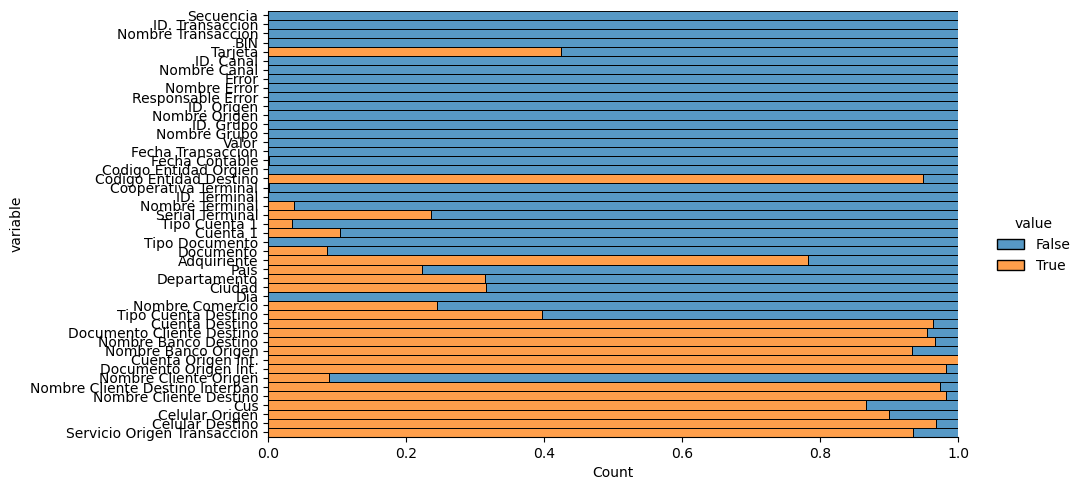

In [45]:
(
    df.isnull()
    .melt().pipe(
        lambda i:(
            sns.displot(
                data = i,
                y = 'variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 2
            )
        )
    )
)

In [46]:
# Reduccoón de dataset, eliminando las variables con mayor cantidad de valores nulos.
df_1 = df[['ID. Grupo','Nombre Grupo', 'ID. Origen', 'Nombre Origen', 'ID. Canal', 'Nombre Canal', 'ID. Terminal', 'Nombre Terminal', 'ID. Transaccion','Nombre Transaccion',
           'Error','Nombre Error', 'Valor','Fecha Transaccion', 'Codigo Entidad Orgien','Cooperativa Terminal','Serial Terminal', 'Tipo Cuenta 1',
           'Cuenta 1','Tipo Documento','Documento','Departamento','Ciudad']]

In [47]:
# Data wrangling: Las transacciones de consulta, registrar valor 0 (cero) en la columna "Valor"
df_1.loc[df_1['Nombre Transaccion'].str.contains('Consul'), 'Valor'] = 0

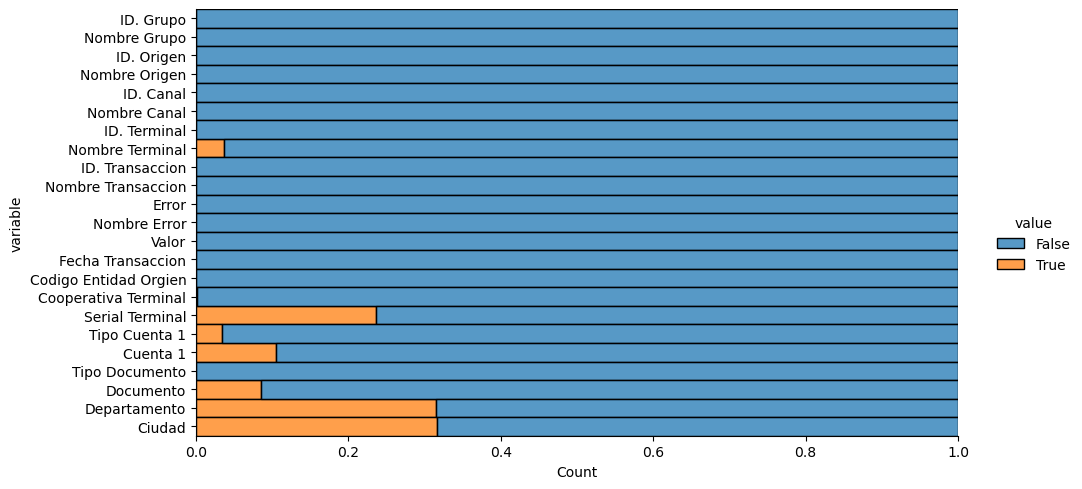

In [48]:
(
    df_1.isnull()
    .melt().pipe(
        lambda i:(
            sns.displot(
                data = i,
                y = 'variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 2
            )
        )
    )
)

<h3> Data Storytelling </h3>
<h4> Grupo Transaccional </h4>
<p> Cada transacción según el proceso requerido esta asociada al grupo transaccional, es decir que para enviar una transacción se debe enviar en la mensajeria el grupo transaccional. en el set de datos analizado el grupo transaccional más representativo es "0200 Solicitud"

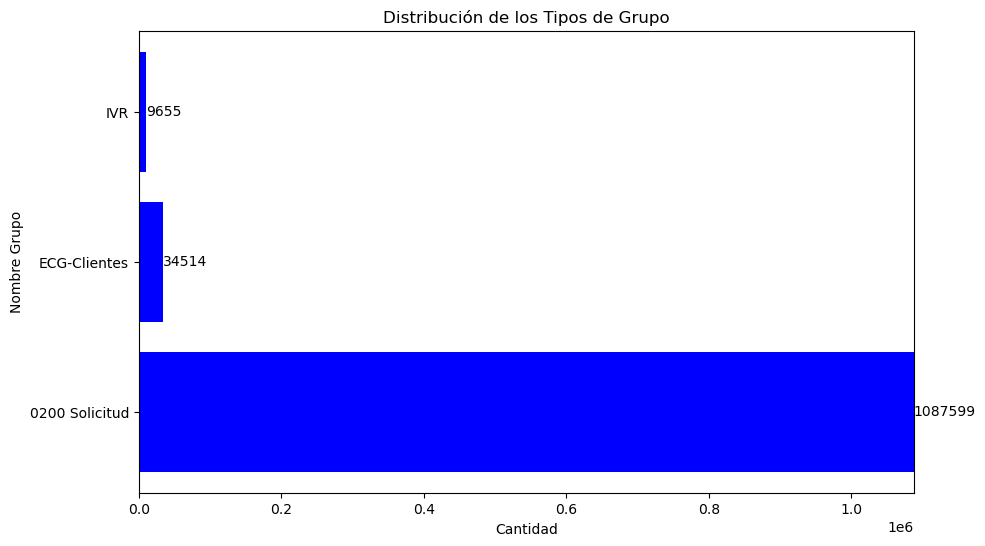

In [49]:
grupo_counts = df_1['Nombre Grupo'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(grupo_counts.index, grupo_counts.values, color='blue')

for i, v in enumerate(grupo_counts.values):
    plt.text(v + 3, i, str(v), color='black', va='center')

plt.xlim([0, max(grupo_counts.values) + 10])

plt.title('Distribución de los Tipos de Grupo')
plt.xlabel('Cantidad')
plt.ylabel('Nombre Grupo')

plt.show()

<h4> Origen transacción </h4>
<p> Identifica la red que origina las solicitures y peticiones hacia la red.

Text(0.5, 0, 'Total')

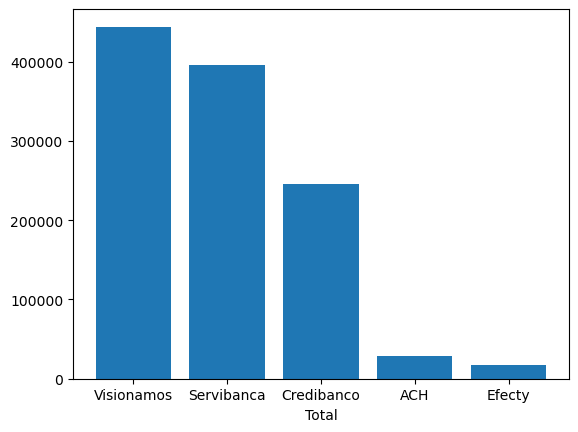

In [50]:
origen = df_1['Nombre Origen'].value_counts()

plt.bar(origen.index, origen.values)
plt.xlabel('Total')

<h4> Canales transaccionales disponibles en la red </h4>


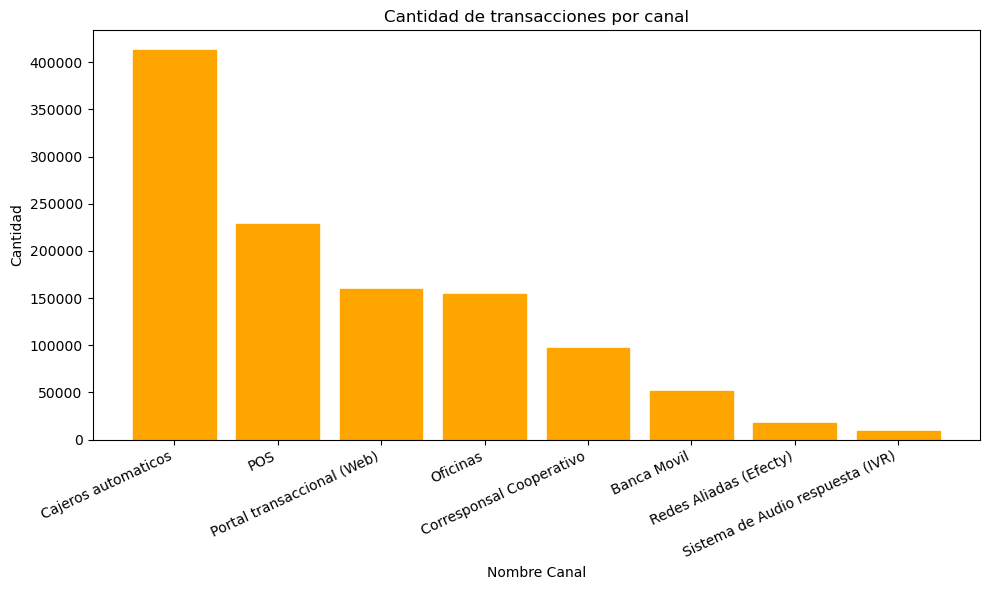

In [51]:
canal = df_1['Nombre Canal'].value_counts()

# Crear un gráfico de barras con etiquetas giradas y barras de color naranja
plt.figure(figsize=(10, 6))
bars = plt.bar(canal.index, canal.values, color='orange')
plt.xlabel('Nombre Canal')
plt.ylabel('Cantidad')
plt.title('Cantidad de transacciones por canal')
plt.xticks(rotation=25, ha='right')  # Girar las etiquetas del eje x en 45 grados y alinearlas a la derecha

# Personalizar el color de las barras a naranja
for bar in bars:
    bar.set_color('orange')

# Ajustar la posición de las etiquetas en el eje x
plt.tight_layout()

plt.show()

<h4> Tipo de terminal </h4>
<p> El tipo de terminal esta asociado al canal transaccional </p>

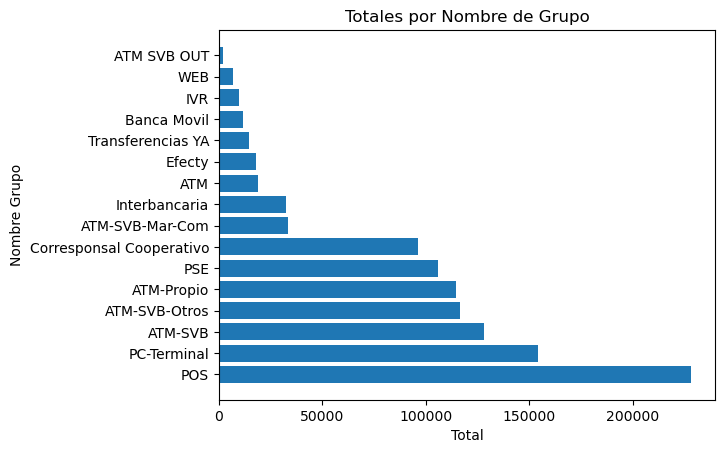

In [52]:
terminal = df_1['Nombre Terminal'].value_counts()

plt.barh(terminal.index, terminal.values)
plt.xlabel('Total')
plt.ylabel('Nombre Grupo')
plt.title('Totales por Nombre de Grupo')

plt.show()

<h3> Estado de la transacción. </h3>
<p> La columna "nombre error", desribe el estado de la transacción realizada, los estados diferentes a exito, son transacciones con errores dentro de la red. 

In [53]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

tabla_errores = df_1['Nombre Error'].value_counts().reset_index()
tabla_errores.columns = ['Nombre Error', 'Conteo']

total_registros = len(df_1)
tabla_errores['Porcentaje'] = (tabla_errores['Conteo'] / total_registros * 100).round(2)

tabla_errores = tabla_errores.sort_values('Conteo', ascending=False)

print(tabla_errores)


                                         Nombre Error  Conteo  Porcentaje
0                                               Exito  991586       87.61
1                       Saldo Disponible Insuficiente   52519        4.64
2                                      Clave invalida   34037        3.01
3                                  Cuenta  no  existe   11094        0.98
4                                           Fall Back   10691        0.94
5                                 Excede Monto limite    5174        0.46
6                                     Fuera de Tiempo    2371        0.21
7                                     No  clasificada    2098        0.19
8                       Monto excede tope transaccion    1732        0.15
9               Monto Excede Tope Diario de la Cuenta    1601        0.14
10              Bloqueo por exceso en intentos de pin    1304        0.12
11                                  Tarjeta Bloqueada    1294        0.11
12             Cliente selecciona Cta 

In [55]:
# Actualizar los valores de la columna "Valor" según la condición
df_1.loc[df_1['Nombre Error'] != 'Exito', 'Valor'] = 0

In [64]:
def rangos(valor):
    if valor > 100000000:
        return '+ 100 m'
    elif valor > 50000000 and valor <= 100000000:
        return '50 m-100 m'
    elif valor > 20000000 and valor <= 50000000:
        return '20 m-50 m'
    elif valor > 5000000 and valor <= 20000000:
        return '5 m-20 m'
    elif valor > 1000000 and valor <= 5000000:
        return '1 m-5 m'
    elif valor > 200000 and valor <= 1000000:
        return '200-1 m'
    elif valor > 50000 and valor <= 200000:
        return '50-200'
    elif valor > 10000 and valor <= 50000:
        return '10-50'
    elif valor > 1 and valor <= 10000:
        return '1-10'
    else:
        return 'Cero'
df_1['Rango'] = df_1['Valor'].apply(rangos)

C:\Users\chech\AppData\Local\Temp\ipykernel_22640\2788017768.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Rango'] = df_1['Valor'].apply(rangos)


<h3> Rango del monto transacción </h3>
<p> Con el fin de identificar las transacciones y los montos se realiza la siguiente barra. </p>

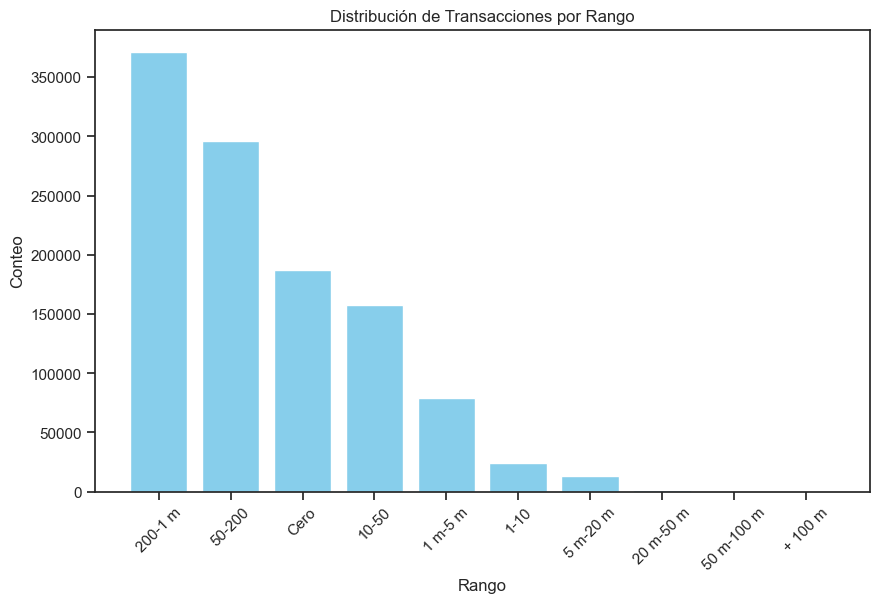

In [66]:
conteo_rangos = df_1['Rango'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(conteo_rangos.index, conteo_rangos.values, color='skyblue')

# Personalizar la gráfica
plt.title('Distribución de Transacciones por Rango')
plt.xlabel('Rango')
plt.ylabel('Conteo')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()